In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
#load dataset
data= pd.read_csv('customer_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [17]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [13]:
data.Channel.unique()

array([2, 1], dtype=int64)

In [14]:
data.Region.unique()

array([3, 1, 2], dtype=int64)

In [15]:
#changing dtype of 'Channel' and 'Region'
data['Channel']=data.Channel.astype(str)
data['Region']=data.Channel.astype(str)

In [20]:
#scaling our data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
data_scaled= sc.fit_transform(data)  #it's in the form of array

#checking statistical desription of scaled data
#data_scaled.describe()
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-2.452584e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-6.902971e-01,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-6.902971e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,-6.902971e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,1.448652e+00,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,1.448652e+00,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [21]:
#n_init : no of times the kmeans algorithm will run with different centroid seeds or iterations
#init: method for initialization

from sklearn.cluster import KMeans , MiniBatchKMeans

In [22]:

kmeans= KMeans(n_clusters=2, init= 'k-means++')
#fitting kmeans on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [23]:
kmeans.inertia_

2172.171710513458

In [27]:
#checking different values of K

SSE=[]     #from 1 to 19
for cluster in range(1,20):
    kmeans= KMeans(n_jobs= -1, n_clusters= cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
   
    

C:\Users\Anam Fatima\Documents\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Anam Fatima\Documents\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Anam Fatima\Documents\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Anam Fatima\Documents\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Anam Fatima\Documents\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.

Text(0, 0.5, 'Inertia')

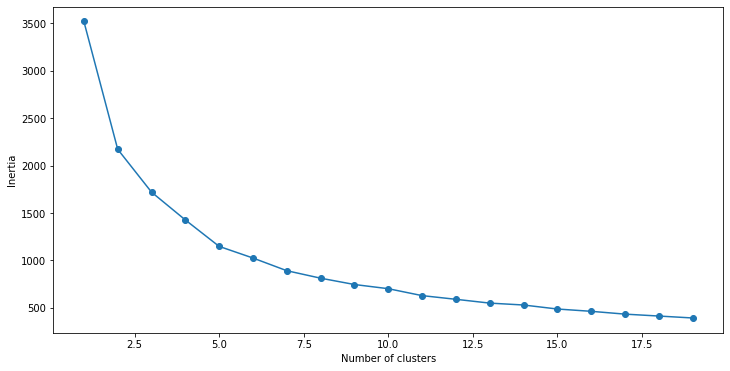

In [28]:
frame= pd.DataFrame({'cluster':range(1,20), 'SSE': SSE})
plt.figure(figsize=(12,6))

plt.plot(frame['cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [30]:
# k means using 5 clusters and k-means++ initialization
kmeans= KMeans(n_jobs=-1, n_clusters= 5, init='k-means++')
kmeans.fit(data_scaled)
kmeans.cluster_centers_

C:\Users\Anam Fatima\Documents\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


array([[-6.90297086e-01, -6.90297086e-01,  1.79286399e+00,
        -3.90262145e-02, -2.18818489e-01,  1.47990928e+00,
        -4.27406125e-01,  4.49507171e-01],
       [ 1.44865163e+00,  1.44865163e+00,  3.13830315e-01,
         3.92190593e+00,  4.27561037e+00, -3.57419457e-03,
         4.61816580e+00,  5.03365339e-01],
       [ 1.44865163e+00,  1.44865163e+00, -2.87412384e-01,
         4.20871458e-01,  6.24830721e-01, -3.14597238e-01,
         6.41321152e-01,  4.91543562e-02],
       [-6.90297086e-01, -6.90297086e-01, -1.97762666e-01,
        -3.91053342e-01, -4.63965439e-01, -1.33122907e-01,
        -4.40719149e-01, -1.93935481e-01],
       [-6.90297086e-01, -6.90297086e-01,  1.96681731e+00,
         5.17550306e+00,  1.28721685e+00,  6.90059988e+00,
        -5.54861977e-01,  1.64784475e+01]])

In [37]:
pred= kmeans.predict(data_scaled)

In [38]:
df= pd.DataFrame(data_scaled)
df['clusters']= pred
df

,0,1,2,3,4,5,6,7,clusters
0,1.448652,1.448652,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,1.448652,1.448652,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2
2,1.448652,1.448652,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2
3,-0.690297,-0.690297,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,3
4,1.448652,1.448652,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2
...,...,...,...,...,...,...,...,...,...
435,-0.690297,-0.690297,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,0
436,-0.690297,-0.690297,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,0
437,1.448652,1.448652,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,2
438,-0.690297,-0.690297,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,3
